In [3]:
import pandas as pd

df = pd.read_csv("classification.csv")

df.head()

,age,interest,success
0,23.657801,18.859917,0.0
1,22.573729,17.969223,0.0
2,32.553424,29.463651,0.0
3,6.718035,25.704665,1.0
4,14.401919,16.770856,0.0


In [4]:
X = df[["age", "interest"]].values
Y = df["success"].values

In [5]:
import helper

In [10]:
from sklearn.model_selection import validation_curve
from sklearn.tree import DecisionTreeClassifier

import numpy as np

# Parameter für k (Wie viele Nachbarn betrachtet werden sollen)
param_range = np.array([ 10, 8, 7, 6, 5, 4, 3, 2, 1])

# n_neighbors bestimmt wie viele Nachbarn sich der Algorithmus anschauen soll
train_scores, test_scores = validation_curve(
    DecisionTreeClassifier(),
    X,
    Y,
    param_name = "max_depth",
    param_range = param_range)

/Users/blertaduraku/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [11]:
# führt eine KCross Validation aus, teilt die Daten automatisch in 3 Sätze mit jeweils Trainings und Testdaten auf

print(train_scores)
print(test_scores)

[[1.         1.         1.        ]
 [1.         1.         1.        ]
 [0.99492386 1.         1.        ]
 [0.99492386 0.99494949 0.99497487]
 [0.98984772 0.99494949 0.99497487]
 [0.96954315 0.98484848 0.9798995 ]
 [0.94416244 0.95959596 0.95477387]
 [0.93401015 0.95454545 0.94974874]
 [0.87817259 0.89393939 0.86432161]]
[[0.92       0.8989899  0.92857143]
 [0.92       0.8989899  0.92857143]
 [0.93       0.8989899  0.93877551]
 [0.93       0.8989899  0.92857143]
 [0.93       0.8989899  0.92857143]
 [0.94       0.8989899  0.92857143]
 [0.94       0.92929293 0.91836735]
 [0.96       0.92929293 0.92857143]
 [0.87       0.84848485 0.89795918]]


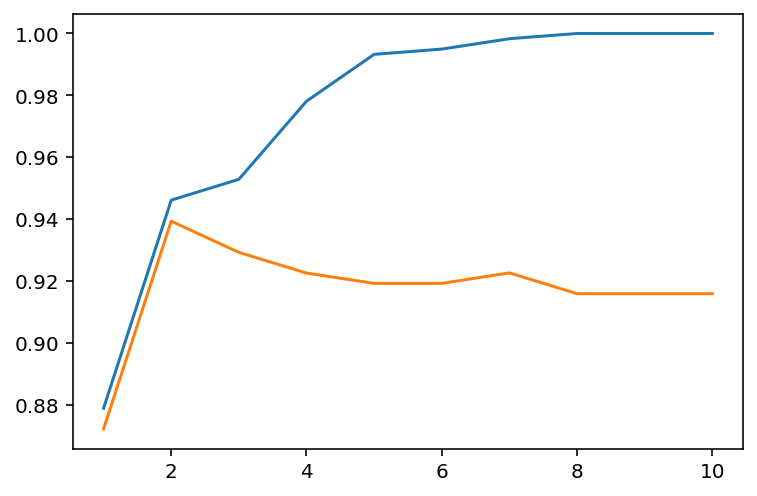

In [12]:
%matplotlib inline

import matplotlib.pyplot as plt

# np.mean bedeutet, dass er den durschnittlichen Score nimmt von den 3 Modellen
plt.plot(param_range, np.mean(train_scores, axis = 1))
plt.plot(param_range, np.mean(test_scores, axis = 1))

# Hiermit drehen wir die X_Achse um, sie geht jetzt von 40 bis 1
#plt.xlim(np.max(param_range), 0)

plt.show()